HW2 - INSIK CHO


1. Chapter2: Exercise 1-5, 7- 13, 16, 17, 20

2. (Ex) Probability of a girl birth given placenta previa

3. Illustrate the effect of prior in binomial model

4. Jefferey's prior for binomial distrubution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy.stats as sps
import sympy
from IPython.display import Image
from scipy.stats import cauchy
from scipy.stats import gamma
import math

#Exercise 1. 

Prior distribution for $\theta$ is given as $Beta(4,4)$. Therefore, $p(\theta)$ $\propto \theta^3  (1-\theta)^3 $

Also, the probability of head coming at least two times equals,
$p(event|\theta) =p(H=0|\theta) + p(H=1|\theta) + p(H=2|\theta)
                 = (1-\theta)^{10} +10 \theta (1-\theta)^9 + 45\theta^2( 1-\theta)^8 $

Finally, posterior is 
$p(\theta) p(event|theta) \propto \theta^3 (1-\theta)^{13} + 10 \theta^4 (1 - \theta)^{12} + 45 \theta^5 (1-\theta)^{11} $

Scatching the graph,

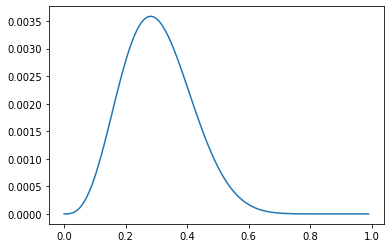

In [ ]:
x = np.arange(0,1,0.01)
y = (x**3)*((1-x)**13) + 10*(x**4)*((1-x)**12) +45*(x**5)*((1-x)**11)
plt.plot(x,y)

#Exercise 2.

The probability that N more tosses are needed is 
$p(N|\theta) = (1-\theta)^{N-1}  \theta$

The above pdf is pdf of $Beta(2,N)$ * $B(2,N)$

If we calulate the expectation, 

$E[N|\theta]  =  \theta + 2(1-\theta)\theta +3(1-\theta)^3\theta + ... \\ 
\quad \quad \quad =\theta+ \theta (1-\theta) + \theta(1-\theta)^2 + \theta(1-\theta)^3 + ...\\ \quad \quad \quad =  \theta (1-\theta) + \theta(1-\theta)^2 + \theta(1-\theta)^3 + ... \\ \quad \quad \quad =  + \theta(1-\theta)^2 + \theta(1-\theta)^3 + ... = \frac{1}{\theta}$

Also, $p(0.4|first Tail \,\,Second Tail) = \frac{0.6^2}{0.4^2+ 0.6^2} = \frac{36}{52} $by bayes theorem

In same way, $p(0.6|first Tail \,\,Second Tail) = \frac{16}{52}$

Finally, $E[N] = E[N|\theta=0.4] p[\theta=0.4] + E[N|\theta=0.6] p[\theta=0.6] = 2.24 $

          


                     
            

#  Exercise 3.

(1)

1000 tosses, and the probabilty to get 6 follows binomial with p = 1/6. Therefore,
$y \sim \, Bin(1000,\frac{1}{6})$, If y is the number of 6 coming 

Because y follows binomial, $E[y] = 1000 * 1/6 = 166, sd[y] =  \sqrt{1000*1/6*5/6} \sim 12 $

If I draw Normal distibution followin  above expectation and standard deviation, 

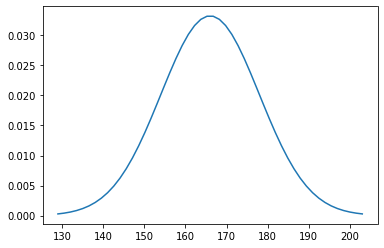

In [ ]:
mu =166; sigma = 12
dist = sps.norm(loc=mu, scale=sigma)
x = np.linspace(dist.ppf(.001), dist.ppf(.999))
y = dist.pdf(x)
plt.plot(x,y)

(2) 

In [ ]:
ppfs = {}
for ppf in [.05, .25, .5, .75, .95]:
    p = dist.ppf(ppf)
    ppfs.update({ppf*100: p})

print(ppfs)

{5.0: 146.26175647658232, 25.0: 157.90612299764703, 50.0: 166.0, 75.0: 174.09387700235297, 95.0: 185.73824352341768}


#Exercise 4

By the information from question,

$y|\theta  \sim  Bin(1000, \theta) -> N(1000*\theta, 1000*\theta*(1-\theta))$

Using above, calculate prior predictive:

$p(y) = p(\theta_1) p(y|\theta_1) + .. + p(\theta_3) p(y|\theta_3)$ 

Indicate the above as graph : 

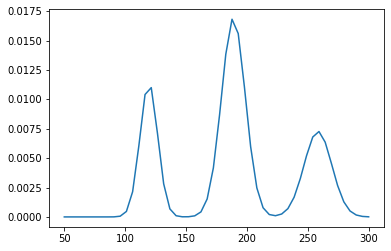

In [ ]:
theta1 = 1/12; theta2 = 1/6 ; theta3 = 1/4 
mu1 = 1000*theta1 ; mu2 = 1000*theta2 ; mu3 = 1000*theta3
sigma1 = np.sqrt(1000*theta1*(1-theta1)); sigma2 = np.sqrt(1000*theta2*(1-theta2)) ; sigma3= np.sqrt(1000*theta3*(1-theta3))

dist1 = (1 / np.sqrt(2 * np.pi * sigma1**2)) * np.exp(-(x-mu1)**2 / (2 * sigma1**2));
dist2 = (1 / np.sqrt(2 * np.pi * sigma2**2)) * np.exp(-(x-mu2)**2 / (2 * sigma2**2));
dist3 = (1 / np.sqrt(2 * np.pi * sigma3**2)) * np.exp(-(x-mu3)**2 / (2 * sigma3**2))
dist = 1/4 * dist1 + 1/2 * dist2 + 1/4 * dist3 

x = np.linspace(50, 300)
y = dist
plt.plot(x,y)

# Exercise8
(a)
By given condition in question, 

Likelihood : $ p(y|\theta) ~\sim normal(\theta, 20^2 ) $  

Prior : $ p(\theta) \sim norm(180,40^2 ) $

from our learning in class,

With normal prior and normal likelihood, posterior follows,

$ p(\theta |y) \sim nomral(\mu_n , \tau_n ^2 )  $

where $ \mu_n = \frac{\frac{1}{\tau_0 ^2} \mu_0 + \frac{n}{\sigma^2} \overline{y}}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2 }}   $ and $ \frac{1}{\tau_1 ^2} = \frac{1}{\tau_0 ^2} + \frac{1}{\sigma^2} $,

 $\tau_0$ = sd of prior, $\sigma$ = sd of likelihood

 If we implement the figurs in problem, $\mu_n = \frac{\frac{180}{40 ^2}  + \frac{n}{20^2} 150}{\frac{1}{40^2} + \frac{n}{20^2 }}$ , $\tau_n^2 = \frac{1}{\frac{1}{40^2} + \frac{n}{20^2 }}$

 (b)
 $p(\tilde{y}|y) \sim nomral(\mu_n , 20^2 +\tau_n^2)$

In [ ]:
#(c)
n = 10 
tau0 = 40
sigma= 20
mu0 = 180
bary = 150

mu = ((mu0/(tau0**2))+ (bary*n)/(sigma**2)) / ((1/(tau0**2))+(n/(sigma**2)))
tau = np.sqrt(1/ ((1/(tau0**2))+(n/(sigma**2))))
dist = sps.norm(loc=mu, scale=tau)
dist2 = sps.norm(loc = mu, scale = np.sqrt(sigma**2 + tau**2))

In [ ]:
print('95% CI for porterior : [' , dist.ppf(0.025),',', dist.ppf(0.975), ']')
print('95% CI for predictive: [' , dist2.ppf(0.025),',', dist2.ppf(0.975), ']')

95% CI for porterior : [ 138.48790937180107 , 162.97550526234522 ]
95% CI for predictive: [ 109.66476055447222 , 191.7986540796741 ]


In [ ]:
#(d)
n=100
mu = ((mu0/(tau0**2))+ (bary*n)/(sigma**2)) / ((1/(tau0**2))+(n/(sigma**2)))
tau = np.sqrt(1/ ((1/(tau0**2))+(n/(sigma**2))))
dist = sps.norm(loc=mu, scale=tau)
dist2 = sps.norm(loc = mu, scale = np.sqrt(sigma**2 + tau**2))

print('95% CI for porterior : [' , dist.ppf(0.025),',', dist.ppf(0.975), ']')
print('95% CI for predictive: [' , dist2.ppf(0.025),',', dist2.ppf(0.975), ']')

95% CI for porterior : [ 146.1597757402296 , 153.98985019493247 ]
95% CI for predictive: [ 110.68051078098051 , 189.46911515418157 ]


#Exercise 9
(a)
by property of beta distribution,

$E[\theta] = \frac{\alpha}{\alpha + \beta}$ = 0.6

$var[\theta] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha +\beta +1)}$ =0.09

If we calculate two equations above, we can get $ \alpha=1 , \beta = \frac{2}{3}$


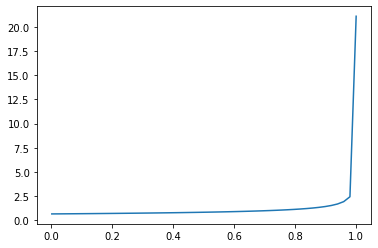

In [ ]:
alpha = 1; beta = 2/3;
dist = sps.beta(a=alpha, b=beta)
x = np.linspace(dist.ppf(.001), dist.ppf(.999))
y = dist.pdf(x)
plt.plot(x,y)

(b)
Likelihood is binomial with $n=1000, y=650$

Therefore, with beta prior and binomial likelihood, posterior follows

$p(\theta | y) \sim beta(1+650, 2/3 + 350)$

The, posterior mean is $\frac{1+650}{1+2/3+650+350} = $0.645

posterior variance is $\frac{(1+650)(2/3+350)}{(1+2/3+650+350)^2 (1+2/3+650+350+1)}$ = 0.000227

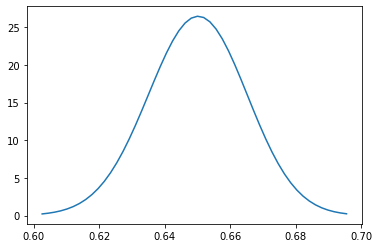

In [ ]:
alpha = (1+650); beta = (2/3+350);
dist = sps.beta(a=alpha, b=beta)
x = np.linspace(dist.ppf(.001), dist.ppf(.999))
y = dist.pdf(x)
plt.plot(x,y)

(c)

Posterior mean and variance can be indicated as below

Poesterior mean : $\frac{\alpha}{\alpha + \beta} \frac{\alpha + \beta}{\alpha + \beta +n } + \frac{y}{n} \frac{n}{\alpha + \beta +n}$

Posterior variance : $ \frac{\alpha+y}{\alpha + \beta+n} \frac{\beta+n-y}{\alpha + \beta+n } \frac{1}{\alpha +\beta +n+1}$

1. the size of $\alpha + \beta$
Posterior variance

If one multiply the size of $\alpha + \beta$ with same proportion of $\alpha, \beta$, like $k \alpha, k\beta$, one can find that the posterior mean approaches to prior mean, posterior variance goes to 0. 


The below graphs indicate the prior with $(\alpha, \beta) = (1,1), (10,10), (100,100)$

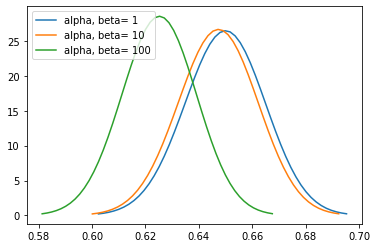

In [ ]:
r = [1,10,100]

for i in r:
  alpha = (i+650); beta = (i +350)
  dist = sps.beta(a=alpha, b=beta)
  x = np.linspace(dist.ppf(.001), dist.ppf(.999))
  y = dist.pdf(x)
  plt.plot(x,y, label = f'alpha, beta= {i}')
  plt.legend()

2. relative size of $\alpha $ and $\beta$

suppose $ \alpha + \beta$ is fixed and relative proportion of $\alpha$ and $\beta$ changes, indicated by $k \alpha$ with $\beta$ fixed. 

Poesterior mean : $\frac{k \alpha}{\alpha + \beta} \frac{\alpha + \beta}{\alpha + \beta +n } + \frac{y}{n} \frac{n}{\alpha + \beta +n}$

as $\alpha$ is lareger, posterior mean approaches to $\frac{1+y}{1+n}$, from $\frac{y}{\alpha + \beta + n}$, whith means that posterior mean is affected less as alpha is being larger

The below graphs are for $\alpha + \beta = 100$ and $\alpha = 1,10,99$

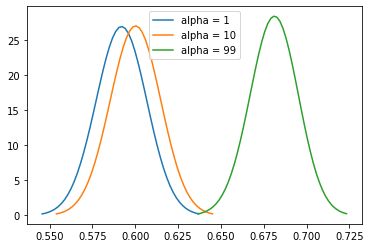

In [ ]:
r = [ 1, 10, 99]

for i in r:
  alpha = (i+650); beta = (100-i +350)
  dist = sps.beta(a=alpha, b=beta)
  x = np.linspace(dist.ppf(.001), dist.ppf(.999))
  y = dist.pdf(x)
  plt.plot(x,y, label = f'alpha = {i}')
  plt.legend()

#Exercise 10

Likelihood can be defiend such as

$p(203|N) = 1/N $ if $N \geq 203$

$ \quad\quad\quad\quad=0$ if $N \leq 203$


Then, posterior is

$p(N|203) \propto p(203|N) p(N) \\ \quad\quad
\quad\quad \propto  \frac{1}{N} \frac{1}{100} (\frac{99}{100})^{N-1}\\
\quad\quad\quad\quad \propto \frac{1}{N}(\frac{99}{100})^{N} , \quad for \; N \geq 203$


The above one is unnormalized, so we have to normalize to be a distribtuion 


In [ ]:
#for normalization 
n=203; sum = 0 ;
while (1/n)*((99/100)**n) >0.0:
  sum =sum + (1/n)*((99/100)**n)
  n= n+1
print('total sum: ', sum)

total sum:  0.046580328231386164


Therefore, normalizing term is $\frac{1}{0.046580328231386164}$ = 21.47

Posterior dist. : $p(N|203) = \frac{21.47}{N} (\frac{99}{100})^N, $ for $N \geq 203$

(b)
$E(N|203) = \sum_{203}^{ \infty } 21.47(0.99)^N = 21.47 (\frac{0.99^{203}}{1-0.99}) \sim 279.111 $

$var(N|203) = \sum_{203}^{\infty} (N-279.11)^2 (21.47 \frac{0.99^N}{N} )$

Calculation by python:

In [ ]:
n=203; sum = 0 ;
while (1/n)*((99/100)**n) >0.0:
  sum =sum + (1/n)*((99/100)**n)*21.47 * ((n-279.11)**2)
  n= n+1
print('standard deviation: ', np.sqrt(sum))

standard deviation:  79.96776270212132


#Exercise 11
with given information,

Prior: $p(\theta) = \frac{1}{100} I_{(0,100)} $

Likelihood: $p(\mathcal{D} |\theta) = \Pi_{i=1}^{n} \frac{1}{1+(y_i -\theta)^2}$

Posterior: $p(\theta) p(\mathcal{D}|\theta) =\frac{1}{100} I_{(0,100)} \Pi_{i=1}^{n} \frac{1}{1+(y_i -\theta)^2}$

Text(0.5, 1.0, 'Unnormalized posterior, enlarged')

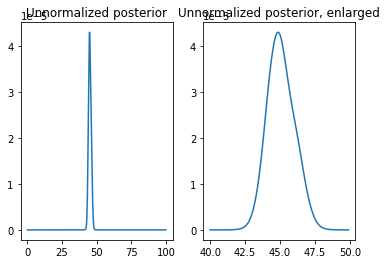

In [ ]:
y = np.array([43,44,45,46.5,47.5])
m = 1000
theta = np.linspace(0,100,m+1)
unpost=  []
for i in range(0,len(theta)):
  unpost.append(1/100 * np.prod(1/((theta[i]-y)**2+1)))

plt.subplot(121)
plt.plot(theta,unpost)
plt.title('Unnormalized posterior')

plt.subplot(122)
plt.plot(theta[400:500],unpost[400:500])
plt.title('Unnormalized posterior, enlarged')

(array([0.01428571, 0.025     , 0.06428571, 0.07857143, 0.125     ,
        0.26071429, 0.38571429, 0.42857143, 0.46071429, 0.28571429,
        0.35357143, 0.325     , 0.23214286, 0.2       , 0.1       ,
        0.1       , 0.075     , 0.04285714, 0.00357143, 0.01071429]),
 array([42.5 , 42.78, 43.06, 43.34, 43.62, 43.9 , 44.18, 44.46, 44.74,
        45.02, 45.3 , 45.58, 45.86, 46.14, 46.42, 46.7 , 46.98, 47.26,
        47.54, 47.82, 48.1 ]),
 <a list of 20 Patch objects>)

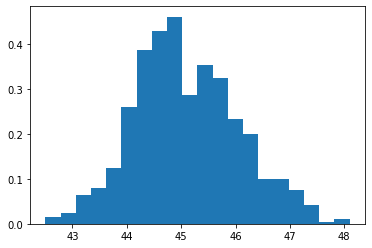

In [ ]:
#(b) 1000개를 추출하고, 이로부터 histogram을 그리면,
thetas = np.random.choice(theta,size=1000, p=unpost/np.sum(unpost))
plt.hist(thetas, bins=20,density = True)

(c)
for each sampled in (b), one can get post.pred. by cauchy(theta,1)

(20.0, 80.0)

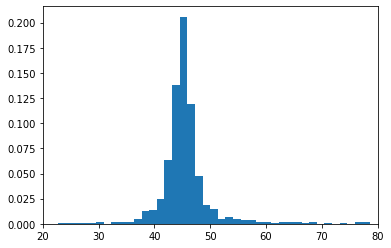

In [ ]:
r=[]
for i in range(0,len(thetas)):
  r.append(cauchy.rvs(size=1, loc = thetas[i],scale=1 ))
r = np.array(r)
plt.hist(r, bins=1000,density = True)
plt.xlim([20,80])


#Excercise 12

#Exercise 13

The model is gamma-poisson. There fore, distributions follow 

Prior : $p(\theta) \sim gamma(a,b)$

Likelihood: $p(\mathcal(D) = \prod_{i=1}^n \frac{\theta^y_i e^{\theta}}{y_i!}$

Posterior: $p(\theta\mathcal(D) \sim gamma(a+n \bar{y}, b+n)$

from the data, $n$ = 10 and $\bar{y} $=23.8

If we assume improper prior , posterior follows $gamma(238,10)$ 

I will find the 95% CI for predictive by simulation.

In [ ]:
#data
y = np.array([24,25,31,31,22,21,26,20,16,22])
n=len(y); ybar = np.mean(y)
#posterior
r=[]
for i in range(1000):
  r.append(gamma.rvs(size=1, a=(n*ybar),scale=1/n ))
#predictive
s=[]
for i in range(len(r)):  
  s.append(sps.poisson.rvs(size=1,mu=r[i] ))
print('95% CI : [', np.percentile(s,2.5) ,',', np.percentile(s,97.5), ']')

95% CI : [ 14.0 , 34.0 ]


(b)
Likelihood changes to : $p(\mathcal{D}| \theta) = \prod_{i=1}^n pois(\theta x_i)$

Therefore, posterior is now: $p(\theta\mathcal(D) \sim gamma(a+n \bar{y}, b+n \bar{x})$

From the data, one can get x like

In [ ]:
x1 = np.array([734,516,754,877,814,362,764,809,223,1066])
x2 = np.array([.19,.12,.15,.16,.14,.06,.13,.13,.03,.15])
x = (x1/x2) *(100000000)
print('x sum: ', sum(x))

x sum:  5715869360902.256


using the same prior above, posterior is : $p(\theta|\mathcal{D}) \sim gamma(238,5715869360902.256)$

Then simulation of predictive is like:

In [ ]:
#posterior
r=[]
for i in range(1000):
  r.append(gamma.rvs(size=1, a=(n*ybar),scale=1/sum(x) ))
#predictive
s=[]
for i in range(len(r)):  
  s.append(sps.poisson.rvs(size=1,mu=(r[i]*8e11) )) # we have to multiply 8X10^11
print('95% CI : [', np.percentile(s,2.5) ,',', np.percentile(s,97.5), ']')

95% CI : [ 22.0 , 47.0 ]


In [ ]:
#c only data changes
y = np.array([734,516,754,877,814,362,764,809,223,1066])
n=len(y); ybar = np.mean(y)
#posterior
r=[]
for i in range(1000):
  r.append(gamma.rvs(size=1, a=(n*ybar),scale=1/n ))
#predictive
s=[]
for i in range(len(r)):  
  s.append(sps.poisson.rvs(size=1,mu=r[i] ))
print('95% CI : [', np.percentile(s,2.5) ,',', np.percentile(s,97.5), ']')

95% CI : [ 639.0 , 747.025 ]


In [ ]:
#d
r=[]
for i in range(1000):
  r.append(gamma.rvs(size=1, a=(n*ybar),scale=1/sum(x) ))
#predictive
s=[]
for i in range(len(r)):  
  s.append(sps.poisson.rvs(size=1,mu=(r[i]*8e11) )) # we have to multiply 8X10^11
print('95% CI : [', np.percentile(s,2.5) ,',', np.percentile(s,97.5), ']')

95% CI : [ 901.0 , 1033.025 ]


(e) we can guess that fatal accidents would grow if more miles are flown, which means that b,d would be better than a,c.

Also, fatal deaths would be clustered, like when airplane accidents happens, so a or b would be better option

#Exercise16

#Exercise17

#Exercise20

#2. (Ex) Probability of a girl birth given placenta previa

95% CI with known posterior : [ 0.41506549245500446 , 0.47719977062943875 ]


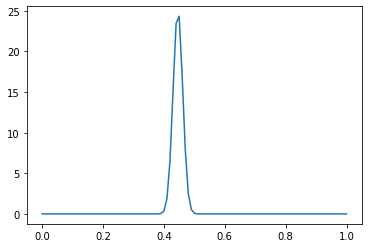

In [ ]:
#1. uniform conjugate prior
n = 980; y = 437

#prior
theta = np.linspace(0,1,101) ; a0=1 ;b0=1;

#1) The posterior form is known
a1 = a0+y ; b1 = b0+n-y

r=[]
for i in range(len(theta)):
  r.append(sps.beta.pdf(theta[i], a=a1,b=b1 ))

plt.plot(theta,r)

print('95% CI with known posterior : [', sps.beta.ppf(0.025,a=a1,b=b1) ,',', sps.beta.ppf(0.975,a=a1,b=b1), ']')


In [ ]:
#2) MC
r=[]
for i in range(len(theta)):
  r.append(sps.beta.rvs(size=1, a=a1,b=b1 ))
r = np.array(r)
print('95% CI by MC approximation: [', np.percentile(r,2.5) ,',', np.percentile(r,97.5), ']')

#3) Normal approximation
mean = np.mean(r)
std = np.std(r)
print('95% CI by normal approximation: [', (mean - 1.96*std) ,',', (mean + 1.96*std), ']')

#4) Normal appr. on logodds
logodds= np.log(r/(1-r))
mean = np.mean(logodds)
std = np.std(logodds)
l = mean - 1.96*std
u = mean + 1.96*std
logl = math.exp(l)/ (1+math.exp(l))
logu = math.exp(u)/ (1+math.exp(u))
print('95% CI by logodd approximation: [', logl ,',', logu, ']')

95% CI by MC approximation: [ 0.4198381714727071 , 0.47081088573906044 ]
95% CI by normal approximation: [ 0.41433605881475616 , 0.4708560589018184 ]
95% CI by logodd approximation: [ 0.4145203046572647 , 0.47094900263893363 ]


Text(0.5, 1.0, 'sex ratio')

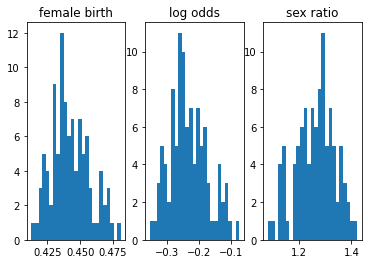

In [ ]:
plt.subplot(131)
plt.hist(r,bins=25)
plt.title('female birth')

plt.subplot(132)
plt.hist(logodds,bins=25)
plt.title('log odds')

plt.subplot(133)
plt.hist((1-r)/r,bins=25)
plt.title('sex ratio')

In [ ]:
#2. sensitivity analysis for prior
# as a+b increasese, posterior meadian approaches to prior mean

n=980; y=437;
prmeans = np.array([0.5, 0.485 ,0.485 ,0.485 ,0.485 ,0.485, 0.485])
prsizes = np.array([2,2,5,10,20,100,200])
pomedian = np.zeros(len(prmeans))
polb = np.zeros(len(prmeans))
poub = np.zeros(len(prmeans))

for i in range(len(prmeans)):
  a = prmeans[i]*prsizes[i]
  b = prsizes[i] -a
  a = a+y
  b = b+n-y
  pomedian[i] = sps.beta.ppf(0.5, a=a, b=b)
  polb[i] = sps.beta.ppf(0.025, a=a, b=b)
  poub[i] = sps.beta.ppf(0.975, a=a, b=b)

data = {'prior_means' : prmeans, 
                      'prior_sizes' : prsizes,
                      'post_median' : pomedian,
                      'post_95_lb' : polb,
                      'post_95_ub' : poub
}
data = pd.DataFrame(data)
data

,prior_means,prior_sizes,post_median,post_95_lb,post_95_ub
0,0.500,2,0.445992,0.415065,0.477200
1,0.485,2,0.445961,0.415035,0.477169
2,0.485,5,0.446080,0.415200,0.477241
3,0.485,10,0.446277,0.415472,0.477359
4,0.485,20,0.446664,0.416010,0.477592
5,0.485,100,0.449506,0.419978,0.479274
6,0.485,200,0.452516,0.424236,0.481001


#3. Illustrate the effect of prior in binomial model

As far as I understood the question, the answer to 9.(c) can replace the answer, so... I skipped it.

#4. Jeffrey's Prior for binomial Distribution